# Capstone PySpark Project by R Shailesh

# Introduction

### This is a historical dataset on the Olympic Games, including all the Games from 2000 to 2012 in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are considered the world’s foremost sports competition with more than 100 nations participating. The total number of sports in this Olympics dataset is 49 and for every event there are winners. It includes the name of the player, country, medals won and year of the olympics

**Data Description**

8618 observations with 10 variables

- name: Name of the Player
- age: Age of the Player
- country: Name of the Player's Country 
- year: year of the olympics
- Date_Given: Date of the event
- sports: Name of the sport in which the player participated
- gold_medal: No of gold medals player won
- silver_medal: No of silver medals player won
- bronze_medal: No of bronze medals player won
- total_medal: Total no of medals player won

#### **Installing Pyspark, Spark Session, SparkContext, SparkConf and SQLContext**

In [ ]:
pip install pyspark #installing pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 50 kB/s 
     |████████████████████████████████| 199 kB 66.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=75ce6e93e57bb5395576b6cf680af99a812ab63474f3c1a25f27ad84b02a8bc6
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import *

conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


#### 1. Write PySpark code to read the olympix_data.csv file

In [ ]:
df = spark.read.format('csv').option('header','true').option('inferSchema','true').load('/content/olympix_data_organized_with_header (1) (1).csv') #reading the csv file

In [ ]:
df.show() #using show function to view the dataset

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

In [ ]:
df.printSchema() #using print schema to get the datatypes of all columns

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



In [ ]:
df.filter(df.name.isNull()).show() # finding the null values in the dataset using isnull function

+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+
|name| age|  country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|Argentina|2012|08-12-2012|    Hockey|         0|           1|          0|          1|
|null|null|Argentina|2012|08-12-2012|    Hockey|         0|           1|          0|          1|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+



**These null values cannot be dropped since it has medals won, country and sports associated with it, so filling the name of the participant with a generic value 'Player' and age as 26 which is the median found in the step 1 Python and DS**

In [ ]:
df = df.na.fill({'age':26, 'name':'Player'}) # filling the name and age null values

In [ ]:
df.filter(df.age.isNull()).show() # finding the null values in the dataset after filling

+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|name|age|country|year|Date_Given|sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+



##### using udf to convert the date column to datetime format

In [ ]:
@udf # using udf annotation
def replc_date(x):
  if x.count('/'): #checking if the date has slash in it
    temp = x.split('/') # splitting for every slash
    if len(temp[1]) == 1: temp[1] = '0'+temp[1] # appending 0 to the beginning of the date if the length of the date is 1
    if len(temp[0]) == 1: temp[0] = '0'+temp[0] # appending 0 to the beginning of the month if the length of the date is 1
    return temp[1]+'-'+temp[0]+'-'+temp[2] #returning after appending 0 and correctly positioning the date so that 
  else: return x # if the date doesn't contain slash return as it is

In [ ]:
df = df.withColumn('Date_Given', replc_date(col('Date_Given'))) # using withcolumn function to replace the date_given column with properly formatted date
df.show() # checking if the date column is correctly formatted

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008|24-08-2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004|29-08-2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008|24-08-2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

In [ ]:
df = df.withColumn('Date_Given',to_date(col("Date_Given"),"dd-MM-yyyy")) # converting the date column datatype to datetime format
df.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008|2008-08-24|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004|2004-08-29|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|2012-12-08|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008|2008-08-24|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|2000-01-10|          Gymnastics|         2|           1|          3|     

In [ ]:
df.printSchema() # checking if the datatype is date

root
 |-- name: string (nullable = false)
 |-- age: integer (nullable = false)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: date (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



#### 2. Write PySpark code to print the Olympic Sports/games in the dataset.

In [ ]:
df_sports = df.select('sports').distinct() # using select function with sports and distinct to get all the sports in the dataset
df_sports.sort('sports').show(df_sports.count()) # displaying all the sports sorted

+--------------------+
|              sports|
+--------------------+
|       Alpine Skiing|
|             Archery|
|           Athletics|
|           Badminton|
|            Baseball|
|          Basketball|
|    Beach Volleyball|
|            Biathlon|
|           Bobsleigh|
|              Boxing|
|            Canoeing|
|Cross Country Skiing|
|             Curling|
|             Cycling|
|              Diving|
|          Equestrian|
|             Fencing|
|      Figure Skating|
|            Football|
|    Freestyle Skiing|
|          Gymnastics|
|            Handball|
|              Hockey|
|          Ice Hockey|
|                Judo|
|                Luge|
|   Modern Pentathlon|
|     Nordic Combined|
| Rhythmic Gymnastics|
|              Rowing|
|             Sailing|
|            Shooting|
|Short-Track Speed...|
|            Skeleton|
|         Ski Jumping|
|        Snowboarding|
|            Softball|
|       Speed Skating|
|            Swimming|
|Synchronized Swim...|
|        Ta

#### 3. Write PySpark code to plot the total number of medals in each Olympic Sport/game

In [ ]:
df_sport = df.groupBy('sports').agg(sum('total_medal').alias('Total Medals')) #using groupby and sum function on sports and total medals respectively
df_sport.show(df.select('sports').distinct().count()) #displaying all the sports with total medals

+--------------------+------------+
|              sports|Total Medals|
+--------------------+------------+
|          Gymnastics|         282|
|              Tennis|          78|
|              Boxing|         188|
|Short-Track Speed...|         138|
|          Ice Hockey|         384|
|              Rowing|         576|
|                Judo|         224|
|            Softball|         134|
|             Sailing|         210|
|            Swimming|         765|
|       Alpine Skiing|          90|
|          Basketball|         287|
|            Handball|         351|
| Rhythmic Gymnastics|          84|
|            Biathlon|         138|
|           Triathlon|          24|
|           Badminton|          96|
|           Athletics|         753|
|      Figure Skating|          54|
|    Beach Volleyball|          48|
|          Equestrian|         182|
|            Shooting|         192|
|              Diving|         144|
|            Skeleton|          18|
|         Ski Jumping|      

In [ ]:
df_sport_pandas = df_sport.toPandas() # using toPandas function to convert to pandas dataframe from pyspark dataframe
df_sport_pandas.head(10)

,sports,Total Medals
0,Gymnastics,282
1,Tennis,78
2,Boxing,188
3,Short-Track Speed Skating,138
4,Ice Hockey,384
5,Rowing,576
6,Judo,224
7,Softball,134
8,Sailing,210
9,Swimming,765


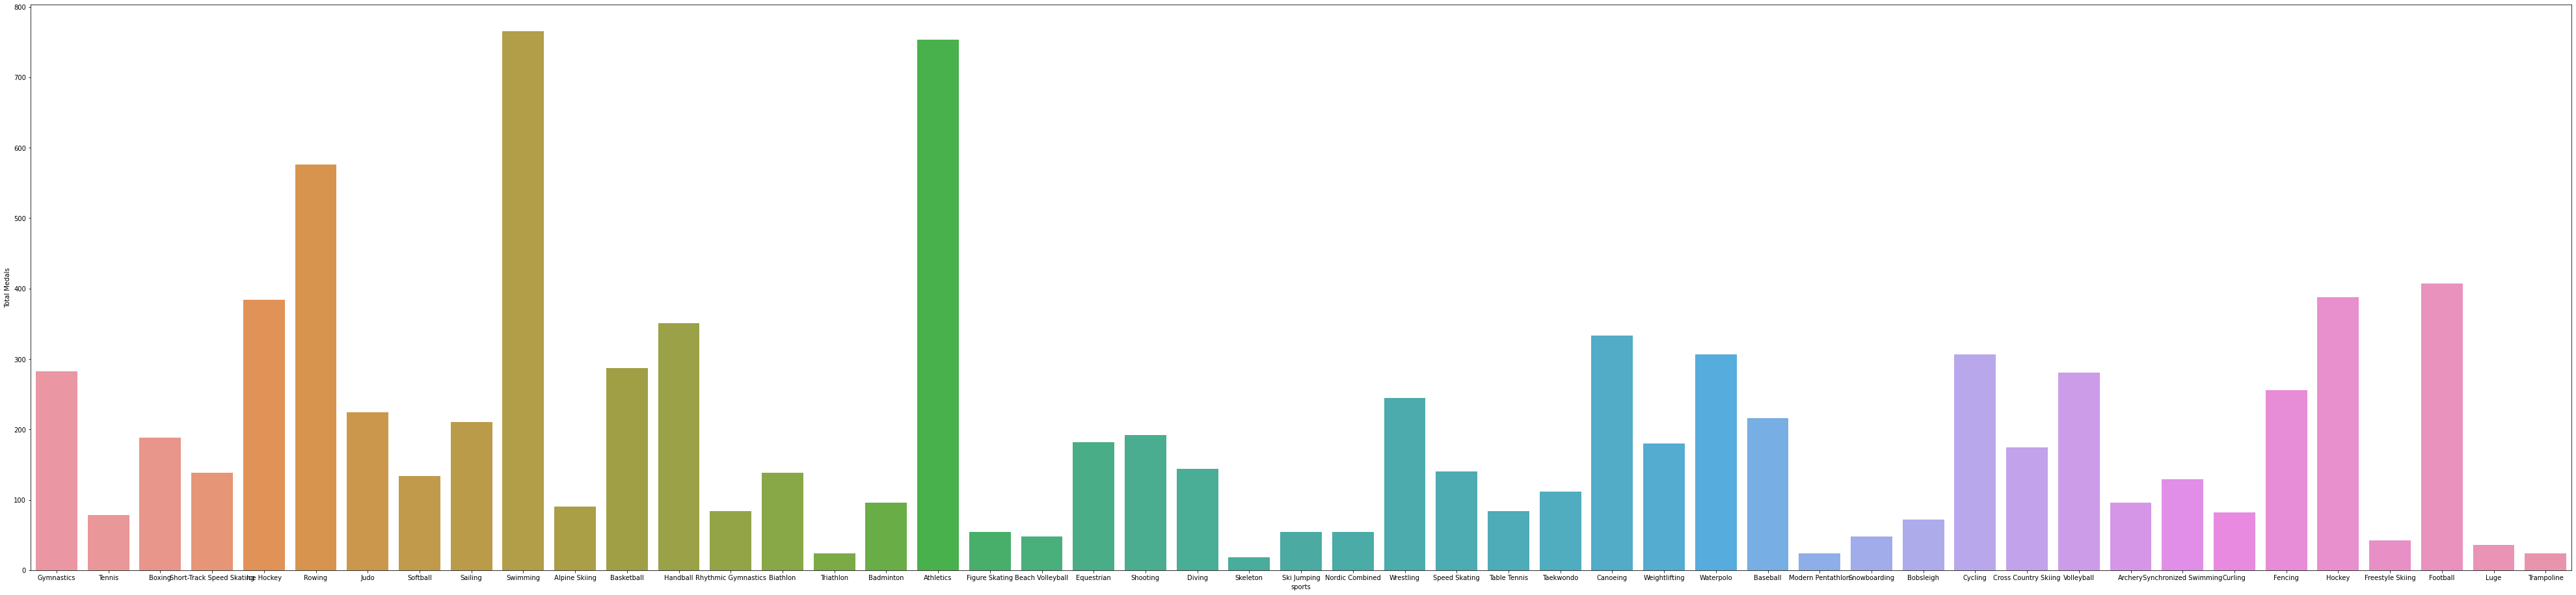

In [ ]:
import seaborn as sns #importing seaborn library for plotting graphs
import matplotlib.pyplot as plt #importing matplotlib library to plot

plt.figure(figsize=(70,16)) # resizing the figure appropriately
sns.barplot(x='sports', y='Total Medals',data=df_sport_pandas) #using barplot to plot sports vs total medals

#### 4. Sort the result based on the total number of medals.

In [ ]:
df.sort('total_medal',ascending=False).show() #using sort function on total medals column

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008|2008-08-24|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004|2004-08-29|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|2012-12-08|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008|2008-08-24|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|2000-01-10|          Gymnastics|         2|           1|          3|     

#### 5. Find the total number of medals won by each country in swimming.

In [ ]:
df_swim = df.filter(df.sports == 'Swimming') # filtering the dataset for swimming sport
df_swim.groupBy('country').agg(sum('total_medal').alias('Total Medals')).sort('Total Medals',ascending=False).show(df.select('country').count()) # using groupby and sum on country and total medal respectively 

+-------------------+------------+
|            country|Total Medals|
+-------------------+------------+
|      United States|         267|
|          Australia|         163|
|        Netherlands|          46|
|              Japan|          43|
|             France|          39|
|              China|          35|
|            Germany|          32|
|             Russia|          20|
|              Italy|          16|
|      Great Britain|          11|
|       South Africa|          11|
|             Sweden|           9|
|            Hungary|           9|
|             Brazil|           8|
|            Ukraine|           7|
|           Zimbabwe|           7|
|            Romania|           6|
|             Canada|           5|
|        South Korea|           4|
|             Poland|           3|
|            Austria|           3|
|            Tunisia|           3|
|              Spain|           3|
|             Norway|           2|
|         Costa Rica|           2|
|            Belarus

#### 6. Find the total number of medals won by each country in Skeleton.

In [ ]:
df_skel = df.filter(df.sports == 'Skeleton') # filtering the dataset for skeleton sport
df_skel.groupBy('country').sum('total_medal').orderBy('sum(total_medal)',ascending=False).show() # using groupby and sum on country and total medal respectively 

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Canada|               4|
|Great Britain|               3|
|  Switzerland|               3|
|United States|               3|
|      Germany|               2|
|       Russia|               1|
|      Austria|               1|
|       Latvia|               1|
+-------------+----------------+



#### 7. Find the number of medals that the US won yearly.

In [ ]:
 df.filter(df.country == 'United States').groupBy(['year','country']).agg(sum('total_medal').alias('Total Medals')).orderBy('year').show()

+----+-------------+------------+
|year|      country|Total Medals|
+----+-------------+------------+
|2000|United States|         243|
|2002|United States|          84|
|2004|United States|         265|
|2006|United States|          52|
|2008|United States|         317|
|2010|United States|          97|
|2012|United States|         254|
+----+-------------+------------+



In [ ]:
# for i in df.select('year').distinct().orderBy('year').collect(): # getting the distinct years in sorted order and iterating
#   df_temp = df.filter((df.year == i.year) & (df.country == 'United States')) # filtering the data for every olympic year and united states country
#   df_temp_res = df_temp.groupBy('country').agg(sum('total_medal').alias('Total Medals')) # using groupby and sum on country and total medal respectively 
#   df_temp_res.withColumn('Year', lit(i.year)).select('Year','Country','Total Medals').show() # adding year column to the output

+----+-------------+------------+
|Year|      Country|Total Medals|
+----+-------------+------------+
|2000|United States|         243|
+----+-------------+------------+

+----+-------------+------------+
|Year|      Country|Total Medals|
+----+-------------+------------+
|2002|United States|          84|
+----+-------------+------------+

+----+-------------+------------+
|Year|      Country|Total Medals|
+----+-------------+------------+
|2004|United States|         265|
+----+-------------+------------+

+----+-------------+------------+
|Year|      Country|Total Medals|
+----+-------------+------------+
|2006|United States|          52|
+----+-------------+------------+

+----+-------------+------------+
|Year|      Country|Total Medals|
+----+-------------+------------+
|2008|United States|         317|
+----+-------------+------------+

+----+-------------+------------+
|Year|      Country|Total Medals|
+----+-------------+------------+
|2010|United States|          97|
+----+---

#### 8. Find the total number of medals won by each country.

In [ ]:
df.groupBy('country').agg(sum('total_medal').alias('Total Medals')).orderBy('Total Medals',ascending=False).show() # using groupby and sum on country and total medal respectively and using orderby on total medals in ascending order

+-------------+------------+
|      country|Total Medals|
+-------------+------------+
|United States|        1312|
|       Russia|         768|
|      Germany|         629|
|    Australia|         609|
|        China|         530|
|       Canada|         370|
|        Italy|         331|
|Great Britain|         322|
|       France|         318|
|  Netherlands|         318|
|  South Korea|         308|
|        Japan|         282|
|       Brazil|         221|
|        Spain|         205|
|       Norway|         192|
|         Cuba|         188|
|       Sweden|         181|
|      Hungary|         145|
|      Ukraine|         143|
|    Argentina|         141|
+-------------+------------+
only showing top 20 rows



#### 9. Who was the oldest athlete in the olympics?

In [ ]:
old_ath = df.filter(df.age == df.agg(max('age')).collect()[0][0]) # using max function on age column to find the oldest athlete and filtering the data to find the name of the oldest athlete
old_ath.show()

+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|      name|age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|Ian Millar| 61| Canada|2008|2008-08-24|Equestrian|         0|           1|          0|          1|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+



Ian Millar is the oldest athlete in the olympics

#### 10.Which country was he/she from?

In [ ]:
old_ath.select('name','country').show() # using the previous step's variable/dataframe and selecting name and country column

+----------+-------+
|      name|country|
+----------+-------+
|Ian Millar| Canada|
+----------+-------+



Ian Millar is from Canada